<a href="https://colab.research.google.com/github/Abdelhak-mekaoui/Digit-Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup data from kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c digit-recognizer

 78% 12.0M/15.3M [00:00<00:00, 120MB/s]
100% 15.3M/15.3M [00:00<00:00, 135MB/s]


In [ ]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Digit Recognizer

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [ ]:
tf.__version__

'2.11.0'

## Data Preprocessing

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Searching for missing values

In [ ]:
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

<AxesSubplot:>

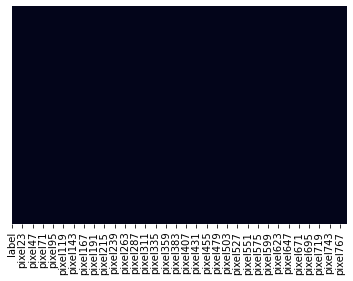

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=train_data.iloc[:,1:].values
y=train_data.iloc[:,0].values
X_test=test_data.iloc[:,:].values

In [ ]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(42000, 784)
(42000,)
(28000, 784)


## Spliting the dataset into training set and cross validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(np.concatenate((X,X_test)))
X_train = np.array(sc.transform(X_train))
X_cv = np.array(sc.transform(X_cv))
X_test = np.array(sc.transform(X_test))

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Training Classification models on X_train and evaluation on X_cv


In [ ]:
 model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=60, activation='relu'),
        tf.keras.layers.Dense(units=60, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax'),
    ])


In [ ]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3194 - accuracy: 0.9062
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1286 - accuracy: 0.9609
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0866 - accuracy: 0.9724
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0669 - accuracy: 0.9788
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0520 - accuracy: 0.9826
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0376 - accuracy: 0.9874
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0316 - accuracy: 0.9895
Epoch 8/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0302 - accuracy: 0.9907
Epoch 9/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0245 - accuracy: 0.9915
Epoch 10/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.021

**Testing and parametre tuning on cv data**

In [ ]:
y_pred = model.predict(X_cv)

263/263 [==============================] - 0s 1ms/step


In [ ]:
print(np.sum(y_pred[0,:]))

1.0000001


In [ ]:
y_pred=[np.argmax(tmp) for tmp in y_pred]
print(len(y_pred))

8400


In [ ]:
print(np.sum(y_pred-y_cv))

-43


In [ ]:
loss, accuracy = model.evaluate(X_cv, y_cv)

263/263 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.9631


In [ ]:
print(loss)
print(accuracy)

0.3876684308052063
0.9630952477455139
